In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
df = read_csv(url, header=None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.describe

<bound method NDFrame.describe of             0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


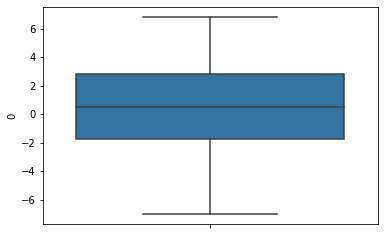

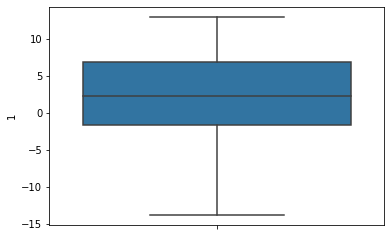

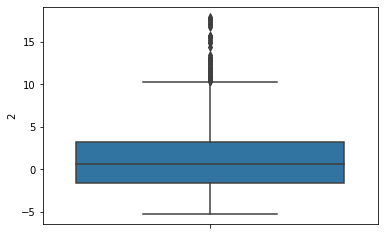

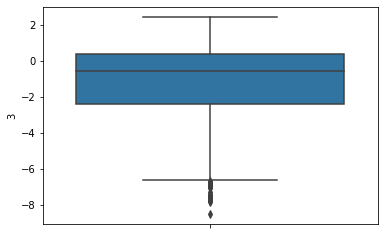

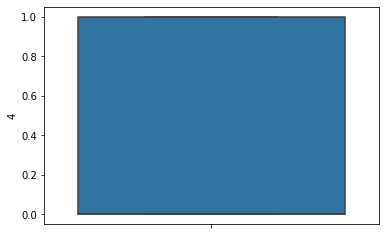

In [ ]:
df1 = df.select_dtypes([np.int64, np.float64])
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(y = col, data = df1)

In [ ]:
X, y = df.values[:, :-1], df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
n_features = X.shape[1]

# Adding layers in NN


## 10 epochs

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test,y_test))
yhat = model.predict(X_test) > 0.5
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Epoch 1/10
35/35 [==============================] - 2s 14ms/step - loss: 0.5149 - accuracy: 0.8304 - val_loss: 0.4183 - val_accuracy: 0.9018
Epoch 2/10
35/35 [==============================] - 0s 8ms/step - loss: 0.3892 - accuracy: 0.9143 - val_loss: 0.3172 - val_accuracy: 0.9600
Epoch 3/10
35/35 [==============================] - 0s 10ms/step - loss: 0.3068 - accuracy: 0.9471 - val_loss: 0.2466 - val_accuracy: 0.9855
Epoch 4/10
35/35 [==============================] - 0s 7ms/step - loss: 0.2468 - accuracy: 0.9599 - val_loss: 0.1944 - val_accuracy: 0.9891
Epoch 5/10
35/35 [==============================] - 0s 8ms/step - loss: 0.2006 - accuracy: 0.9717 - val_loss: 0.1574 - val_accuracy: 0.9855
Epoch 6/10
35/35 [==============================] - 0s 11ms/step - loss: 0.1674 - accuracy: 0.9781 - val_loss: 0.1309 - val_accuracy: 0.9891
Epoch 7/10
35/35 [==============================] - 0s 7ms/step - loss: 0.1421 - accuracy: 0.9872 - val_loss: 0.1111 - val_accuracy: 0.9891
Epoch 8/10
35/35 

### Reports and accuracy

In [ ]:
classification_report(y_test, yhat, labels=[0,1])

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       163\n           1       0.99      0.99      0.99       112\n\n    accuracy                           0.99       275\n   macro avg       0.99      0.99      0.99       275\nweighted avg       0.99      0.99      0.99       275\n'

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.995, Test Accuracy: 0.993


## Loss curve and accuracy curve wrt to epochs

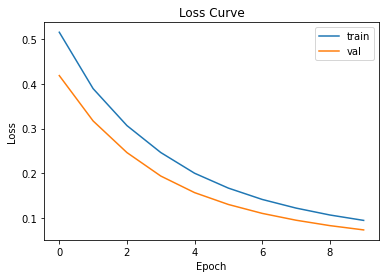

In [ ]:
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

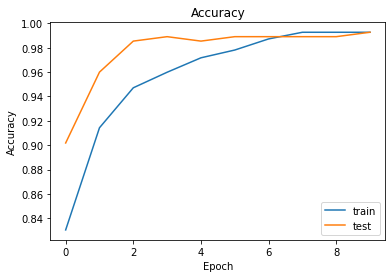

In [ ]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
yhat_probs = model.predict(X_test, verbose=2)>0.5
yhat_classes = model.predict(X_test, verbose=0)>0.5
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

9/9 - 0s - 76ms/epoch - 8ms/step


### Scores

In [ ]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.992727
Precision: 0.991071
Recall: 0.991071
F1 score: 0.991071
ROC AUC: 0.992468
[[162   1]
 [  1 111]]


### Making it better by running more epochs

## 20 epochs

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test,y_test))
yhat = model.predict(X_test) > 0.5
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Epoch 1/20
35/35 [==============================] - 3s 23ms/step - loss: 0.6195 - accuracy: 0.7502 - val_loss: 0.5435 - val_accuracy: 0.7891
Epoch 2/20
35/35 [==============================] - 0s 14ms/step - loss: 0.5108 - accuracy: 0.8323 - val_loss: 0.4464 - val_accuracy: 0.9091
Epoch 3/20
35/35 [==============================] - 0s 10ms/step - loss: 0.4217 - accuracy: 0.9289 - val_loss: 0.3578 - val_accuracy: 0.9600
Epoch 4/20
35/35 [==============================] - 0s 9ms/step - loss: 0.3366 - accuracy: 0.9608 - val_loss: 0.2774 - val_accuracy: 0.9745
Epoch 5/20
35/35 [==============================] - 0s 8ms/step - loss: 0.2641 - accuracy: 0.9717 - val_loss: 0.2153 - val_accuracy: 0.9818
Epoch 6/20
35/35 [==============================] - 0s 12ms/step - loss: 0.2090 - accuracy: 0.9799 - val_loss: 0.1695 - val_accuracy: 0.9818
Epoch 7/20
35/35 [==============================] - 0s 10ms/step - loss: 0.1690 - accuracy: 0.9827 - val_loss: 0.1372 - val_accuracy: 0.9855
Epoch 8/20
35/3

### Reports and accuracy

In [ ]:
classification_report(y_test, yhat, labels=[0,1])

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       163\n           1       1.00      1.00      1.00       112\n\n    accuracy                           1.00       275\n   macro avg       1.00      1.00      1.00       275\nweighted avg       1.00      1.00      1.00       275\n'

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 1.000, Test Accuracy: 1.000


## Loss curve and accuracy curve wrt to epochs

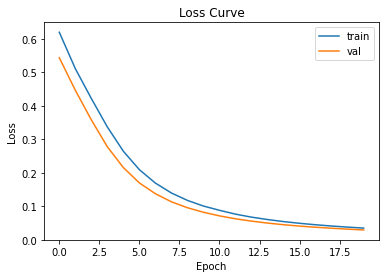

In [ ]:
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

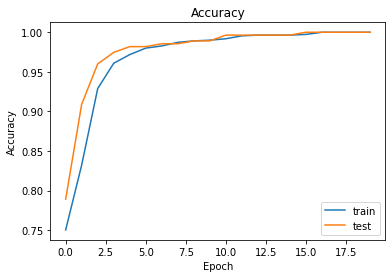

In [ ]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
yhat_probs = model.predict(X_test, verbose=2)>0.5
yhat_classes = model.predict(X_test, verbose=0)>0.5
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

9/9 - 0s - 93ms/epoch - 10ms/step


### Scores

In [ ]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
ROC AUC: 1.000000
[[163   0]
 [  0 112]]
